In [108]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import random
import cv2
import os

# X_train and Y_train Process

In [208]:
DATADIR = '/home/vinicius/Documents/DataBase/Images_Dataset/Cat_x_Dog_with_numbers'
CATEGORIES = ['Cat', 'Dog']
IMG_SIZE = 200
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for image in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

100%|██████████| 1000/1000 [00:01<00:00, 914.33it/s]


In [209]:
random.shuffle(training_data)

x = []
y = []
for features, labels in training_data:
    x.append(features)
    y.append(labels)

x = np.array(x).reshape(-1, IMG_SIZE * IMG_SIZE)
X_train = x.T

print('#' * 70, '\n')
print('O tamanho do nosso conjunto de entrada para treino é: {}'.format(X_train.shape), '\n')

y = np.array(y).reshape(1, -1)
Y_train = y

print('#' * 70, '\n')
print('O tamanho do conjunto de saída rotulada para treino é: {}'.format(Y_train.shape), '\n')

###################################################################### 

O tamanho do nosso conjunto de entrada para treino é: (40000, 1995) 

###################################################################### 

O tamanho do conjunto de saída rotulada para treino é: (1, 1995) 



# X_test and Y_test Process

In [210]:
DATADIR = '/home/vinicius/Documents/DataBase/Images_Dataset/Cat_x_Dog_with_numbers'
CATEGORIES = ['Cat_test', 'Dog_test']
IMG_SIZE = 200
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for image in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
create_testing_data()

100%|██████████| 300/300 [00:00<00:00, 926.67it/s]


In [211]:
random.shuffle(testing_data)

x = []
y = []
for features, labels in testing_data:
    x.append(features)
    y.append(labels)
    
X_test = np.array(x).reshape(-1, IMG_SIZE * IMG_SIZE).T

print('#' * 70, '\n')
print('O tamanho do nosso conjunto de entrada para teste é: {}'.format(X_test.shape), '\n')

Y_test = np.array(y).reshape(1, -1)

print('#' * 70, '\n')
print('O tamanho do conjunto de saída rotulada para teste é: {}'.format(Y_test.shape), '\n')

###################################################################### 

O tamanho do nosso conjunto de entrada para teste é: (40000, 600) 

###################################################################### 

O tamanho do conjunto de saída rotulada para teste é: (1, 600) 



# Normalization of input data

In [212]:
X_train = X_train / 255
X_test = X_test / 255

# Sigmoid Function

In [213]:
def sigmoid(z):
    """
    Função de ativação para o cálculo da sigmoide de z 
    """
    sigmoid = 1 / (1 + np.exp(-z))
    
    return sigmoid

# Layers size

In [214]:
def layers_size(X, Y):
    """
    O n_x corresponde ao tamanho dos nossos valores de entrada, ou seja, o número de linhas
    de nossa matriz X_train, que são os valores de pixel de cada uma das imagens, que são
    vetores colunas da X_train. O n_y corresponde ao número de linhas da nossa matriz Y_train,
    que são os valores rotulados de saída, ou seja, um por cada imagem, por isso a matriz 
    Y_train é uma matriz linha, com apenas uma linha, ou seja, um nó na camada de saída.
    E o n_h é o tamanho de nossa camada oculta, ou seja, o número de nós da nossa camada oculta.
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

# Initilization

In [215]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Inicializaremos os parâmetros W como uma matriz randômica de tamanho linhas do local que
    estamos com o parâmetro, e colunas do local da camada anterior. O mesmo para o parâmetro b,
    mas a diferença é que temos que multiplicar a matriz W por um valor de "0.01".
    """
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape = (n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape = (n_y, 1))
    
    parametros = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    return parametros

# Forward Propagation

In [216]:
def forward_propagation(X, parametros):
    """
    Realiza-se a propagação pra frente para cálculo dos valores de ativação A, que são
    colocados na forma de matrizes, A1 tem tamanho (4, m_exemplos) e A2 tem tamanho 
    (1, m_exemplos). Com a np.dot fazemos a vetorização das matrizes. A np.tanh e a função de
    ativação para as quatro unidades ocultas da hidden, e a sigmoidpara fazer a classificação
    binária. Os valores são armazenados para utilizar depois.
    
    """
    W1 = parametros['W1']
    W2 = parametros['W2']
    b1 = parametros['b1']
    b2 = parametros['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    
    return A2, cache

# Cost Function

In [217]:
def compute_cost(A2, Y, parametros):
    """
    Aqui calcula-se o valor da função de custo, levando em consideração que temos que dividir
    o valor da soma de todos os valores da funçã de custo pelo número de exemplos, temos a
    equação abaixo.
    """
    m = Y.shape[1]
    
    W1 = parametros['W1']
    W2 = parametros['W2']
    
    cost = (np.log(A2) * Y) + ((1 - Y) * (np.log(1 - A2)))
    cost = (-1/ m) * np.sum(cost)
    cost = np.squeeze(cost)
    
    return cost

# Backward Propagation

In [218]:
def backward_propagation(parametros, cache, X, Y):
    """
    Aqui é realizado a retro-propagação para o cálculo das derivadas em cada camada.
    No caso da dZ1 utiliza-se a derivada da função de ativação com o valor Z1, mas não temos
    como usar a derivada de tanh, portanto utilizamos algo que substitui isso.
    """
    m = X.shape[1]
    
    W1 = parametros['W1']
    W2 = parametros['W2']
    
    Z1 = cache['Z1']
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    
    gradientes = {'dW1': dW1, 'dW2': dW2, 'db1': db1, 'db2': db2}
    
    return gradientes

# Atualization

In [219]:
def update_parameters(parametros, gradientes, learning_rate = 0.001):
    """
    Realizamos a atualização dos parametros para cada passo na rede neural utilizar
    os melhores valores dos parametros.
    """
    W1 = parametros['W1']
    W2 = parametros['W2']
    b1 = parametros['b1']
    b2 = parametros['b2']
    
    dW1 = gradientes['dW1']
    dW2 = gradientes['dW2']
    db1 = gradientes['db1']
    db2 = gradientes['db2']
    
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parametros = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
    
    return parametros

# Predictions

In [220]:
def predict(parametros, X):
    """
    As predições são feitas com base nos resultados da função de ativação, que gera os
    valores da matriz A que é de uma linha e m colunas, ela percorre cada valor
    das m colunas e verifica o valor presente nessa coluna de A.
    """
    m = X.shape[1]
    Y_predict = np.zeros(shape = (1, m))
    A2, cache  = forward_propagation(X, parametros)
    
    for i in range(A2.shape[1]):       
        if A2[0, i] > 0.5:
            Y_predict[0, i] = 1
        else:
            0
    return Y_predict

# Model

In [221]:
def model(X_train, Y_train, X_test, Y_test, n_h, num_iterations, learning_rate, print_cost):
    """
    O nosso modelo é capaz de calcular as propagações com as funções que criamos, e irá
    printar o valor da função de custo.
    """
    cost_list = []
    np.random.seed(2)
    
    n_x = layers_size(X_train, Y_train)[0]
    n_y = layers_size(X_train, Y_train)[2]
    
    parametros = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parametros['W1']
    W2 = parametros['W2']
    b1 = parametros['b1']
    b2 = parametros['b2']
    
    for i in range(num_iterations):
        A2, cache = forward_propagation(X_train, parametros)
        cost = compute_cost(A2, Y_train, parametros)
        gradientes = backward_propagation(parametros, cache, X_train, Y_train)
        parametros = update_parameters(parametros, gradientes)
        
        if i % 200 == 0:
            cost_list.append(cost)
        if print_cost and i % 200 == 0:
            print ('Valor da função de custo após a {}ª iteração: {}'.format(i, cost))
            
    Y_prediction_test = predict(parametros, X_test)
    Y_prediction_train = predict(parametros, X_train)
        
    print('Acurácia treino: {} %'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print('Acurácia teste: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    resultado = {'custo': cost_list,
                'Predições no teste': Y_prediction_test,
                'Predições no treino': Y_prediction_train,
                'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,
                'Learning rate': learning_rate,
                'Numero de iterações': num_iterations}
    
    return resultado

In [222]:
resultado = model(X_train, Y_train, X_test, Y_test, n_h = 8, num_iterations = 1000, learning_rate = 2, print_cost = True)

Valor da função de custo após a 0ª iteração: 0.6930960047562421
Valor da função de custo após a 200ª iteração: 0.6929733085933065
Valor da função de custo após a 400ª iteração: 0.6928471005914149
Valor da função de custo após a 600ª iteração: 0.6926997558734929
Valor da função de custo após a 800ª iteração: 0.6925180152597181
Acurácia treino: 52.98245614035088 %
Acurácia teste: 51.666666666666664 %


# Cost Function Graph

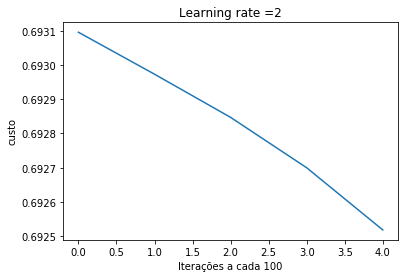

In [223]:
custo = np.squeeze(resultado['custo'])
plt.plot(custo)
plt.ylabel('custo')
plt.xlabel('Iterações a cada 100')
plt.title("Learning rate =" + str(resultado["Learning rate"]))
plt.show()

# Image test from X_test

Y rotulado nos testes = 0, você preveu ser "1.0


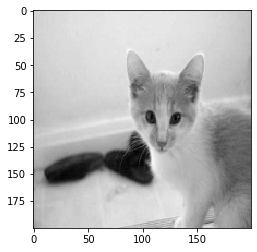

In [238]:
index = 15
plt.imshow(X_test[:,index].reshape((IMG_SIZE, IMG_SIZE)), cmap = 'gray')
print ("Y rotulado nos testes = " + str(Y_test[0,index]) + ", você preveu ser \"" + str(resultado["Predições no teste"][0,index]))